# Eclat Intuition

Eclat is one another association rule learning algorithm like Apriori. This is again a part of recommendation systems. It is the simplified version of apriori model.

Eclat is faster than apriori algorithm. Means, it's execution is fast when compared to apriori.

Unlike apriori, elcat has just **support** part. It doesn't have **confidence or lift**part. It doesn't even have any rules.

Again, when we discuss about the topics of movie recommendation to people, both eclat and apriori is not just discussion about one movie. It's a set of movies. more than one movie or two movies and more than that.

So, a set of movies is used in algorithm or support. it's not just one movie like Interstellar. It's a collection of movies applied in support formula to identify the recommendation of a movie.

So, the rule is,

**Support(M) = No.of users watchlist containing (M) / No.of user watchlists

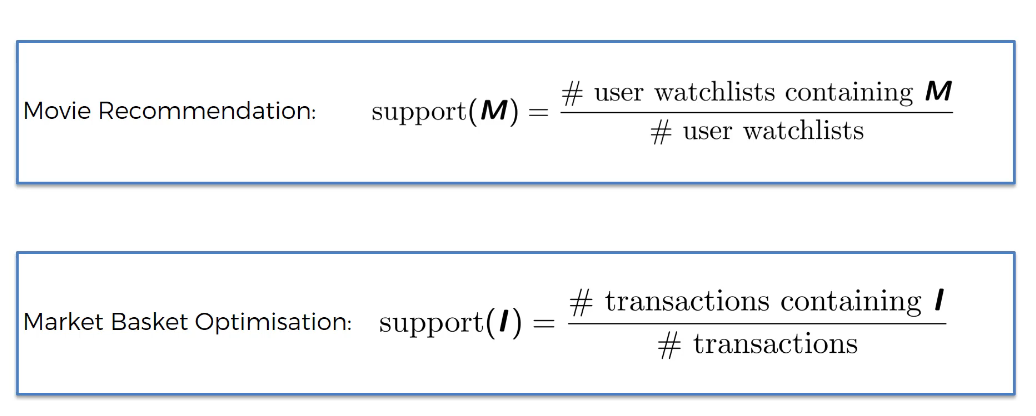

The samething is applicable for market basket optimisation.

Like apriori, this eclat also follows some steps to execute the rule. They are,

**Step1** - Set a minimum support. Like, ignoring few percentages of list of movies by speculation that these movies will not workout. It may like 20% of movies are ruled out in the first step itself.

**Step2** - Take all the subsets in transactions having higher support than minimum support.

**Step3** - Sort these subsets by decreasing support

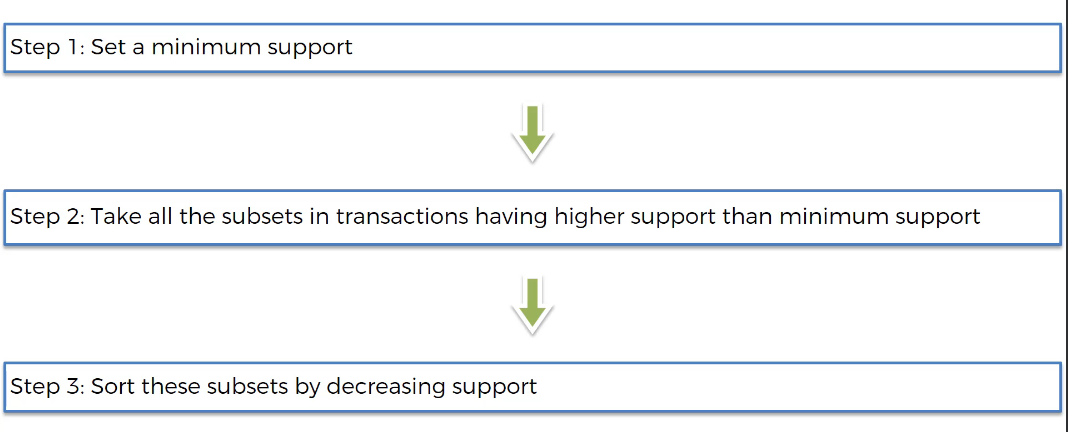

# Importing libraries

In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

In [3]:
"""Here, we are reusing the dataset that are used in apriori model"""

df = pd.read_csv('/kaggle/input/market-basket-analysis/Market_Basket_Optimisation.csv',header=None)
data = []
for i in range(0,7501):
    data.append([str(df.values[i,j]) for j in range(0,20)])

# Training Eclat model on dataset

In [4]:
"""Although for eclat model, we don't use confidence & lift, we will still use those paramters.

apriori function will take parameters such as datasets on which we are going to apply the apriori model. the name of
the parameter is transactions and the value for that is the data list which we created.

The next parameter is min_support. This is the support. We set the value for this is with minimum support value
as there is a support for each rule and not to compute all the rules but atleast the rules with some certain relevance.
The value is decided purely based on requirement. Here we need one product on left hand side of rule and the other
product/element on the right hand side of rule. We want this products to be appeared for a minimum amount of time
which is what exactly the support is. So, we consider 3 times to be appeared for these products daily. Since
the 7501 products are recorded per week, we multiply this 3 times by 7 and the
total divided by 7501. ((3*7)/7501 = 0.0027 rounded off to 0.003).
This simply means, the product in the rules should appear 0.3% times of the time.

The next paramter is min_confidence. The value for this min_confidence is done using the thumb rule which is 0.8.
But this value is way too high because 0.8 means, it should be 80% correct and since we have very few rules,
we choose here as 0.2 Choosing this value again depends based on business requirement. This again means for
each product A in left hand side of rules, we will have product B in right hand side atleast 20%

The next parameter is min_lift. The value of min_lift should atleast be 3. Anything below that will not make the
rule to be relevant. This is again rule of thumb and based on the experience.

The next parameter is min_length which is actually the minimum no.of elements we want in our rule left or right.
Since we need only 2 products at the end. One on the left hand side of rule and the other is right hand side of
rule, the value is 2.

The next parameter is max_length which is actually the maximum no.of elements we want in our rule left or right.
Since we need only 2 products at the end. One on the left hand side of rule and the other is right hand side of rule,
the value is 2.

For example, if the rule or to find the deals for buy 2 and get 1 free, then the min_length=3 and max_length=3"""

from apyori import apriori
products = apriori(transactions=data, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

# Displaying the first result coming directly from the output of apriori function

In [5]:
results = list(products)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

# Putting the results well organised into pandas dataframe

In [17]:
"""Since the eclat model is focussing only on sets of products we will not consider confidence and lift"""

def inspect(products):
    product1 = [tuple(result[2][0][0])[0] for result in results]
    product2 = [tuple(result[2][0][1])[0] for result in results]
    support = [result[1] for result in results]
    return list(zip(product1, product2, support))
resultsinDataFrame = pd.DataFrame(inspect(products),columns=['Products1', 'Products2', 'Support'])

# Displaying the result sorted by descending support

In [18]:
resultsinDataFrame.nlargest(n=10, columns='Support')

,Products1,Products2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
